## Bakery Day of Sale Prediction

Given data about *bakery sales*, let's try to predict whether a given day of sales is a **weekend** or not. 

Data Source: https://www.kaggle.com/datasets/hosubjeong/bakery-sales?select=Bakery+Sales.csv

We will use a logistic regression model to make our predictions.

### Getting Started

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('Bakery Sales.csv')
data

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

### Preprocessing

In [4]:
df = data.copy()

In [5]:
df['place'].unique()

array([nan, '효자 3동', '후평 1동', '후평 2동', '석사동', '소양동', '퇴계동', '동면', '후평 3동',
       '신사우동', '강남동', '효자 1동', '조운동', '교동', '효자 2동', '약사명동', '근화동', '동내면',
       '교동 ', '신동면'], dtype=object)

In [6]:
# Drop place column
df = df.drop('place', axis=1)
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

datetime               233
day of week            234
total                  234
angbutter              681
plain bread           1797
jam                   2434
americano             2242
croissant             1907
caffe latte           2461
tiramisu croissant    1875
cacao deep            2331
pain au chocolat      2067
almond croissant      2452
croque monsieur       2654
mad garlic            2654
milk tea              2517
gateau chocolat       2458
pandoro               2311
cheese cake           2564
lemon ade             2619
orange pound          2135
wiener                2299
vanila latte          2445
berry ade             2600
tiramisu              2647
merinque cookies      2607
dtype: int64

In [8]:
# Drop rows without sales or date information
missing_rows = df[df[['datetime', 'day of week', 'total']].isna().any(axis=1)].index
df = df.drop(missing_rows, axis=0).reset_index(drop=True)

In [9]:
# Drop single-valued columns
df = df.drop(['croque monsieur', 'mad garlic'], axis=1)

In [10]:
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,Sat,19500.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39,Sat,19800.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15,Sat,14300.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45,Sat,15000.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Fill remaining missing values with 0
df = df.fillna(0)
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11 16:10,Thur,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12 11:49,Fri,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13 13:19,Sat,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13 13:22,Sat,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,Sat,19500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2416,2020-05-02 11:39,Sat,19800.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2417,2020-05-02 12:15,Sat,14300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,2020-05-02 13:45,Sat,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
for group in df.groupby('day of week'):
    print(group)

('Fri',               datetime day of week    total  angbutter  plain bread  jam  \
2     2019-07-12 11:49         Fri  58000.0        0.0          0.0  0.0   
26    2019-07-19 11:43         Fri  14800.0        1.0          0.0  0.0   
27    2019-07-19 12:11         Fri  15800.0        1.0          0.0  0.0   
28    2019-07-19 12:36         Fri  21800.0        1.0          0.0  0.0   
29    2019-07-19 12:44         Fri  20600.0        2.0          0.0  0.0   
...                ...         ...      ...        ...          ...  ...   
2410  2020-05-01 12:10         Fri  18300.0        1.0          1.0  0.0   
2411  2020-05-01 13:05         Fri  28400.0        4.0          1.0  0.0   
2412  2020-05-01 13:55         Fri  21300.0        1.0          0.0  0.0   
2413  2020-05-01 15:03         Fri  14800.0        1.0          0.0  0.0   
2414  2020-05-01 15:19         Fri  14500.0        0.0          1.0  0.0   

      americano  croissant  caffe latte  tiramisu croissant  cacao deep  \
2   

In [13]:
def drop_time_information(x):
    return re.sub(r' \d+:\d+$', '', x)

In [14]:
drop_time_information('2020-04-27 16:00')

'2020-04-27'

In [15]:
# Remove time information from datetime column
df['datetime'] = df['datetime'].apply(lambda x: re.sub(r' \d+:\d+$', '', x))

In [16]:
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11,Thur,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11,Thur,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12,Fri,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13,Sat,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13,Sat,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02,Sat,19500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2416,2020-05-02,Sat,19800.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2417,2020-05-02,Sat,14300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,2020-05-02,Sat,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Save a copy of the datetime and the day of week columns
day_mapping = df[['datetime', 'day of week']].copy()

In [18]:
# Group by date
df = df.groupby(by='datetime', as_index=False).sum(numeric_only=True)
df

,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-12,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-13,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
3,2019-07-14,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
4,2019-07-15,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020-04-27,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
245,2020-04-29,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246,2020-04-30,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
247,2020-05-01,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0


In [19]:
day_mapping

,datetime,day of week
0,2019-07-11,Thur
1,2019-07-11,Thur
2,2019-07-12,Fri
3,2019-07-13,Sat
4,2019-07-13,Sat
...,...,...
2415,2020-05-02,Sat
2416,2020-05-02,Sat
2417,2020-05-02,Sat
2418,2020-05-02,Sat


In [20]:
# Recreate day of week values from day_mapping
df['day'] = df['datetime'].apply(lambda x: day_mapping[day_mapping['datetime'] == x].values[0][1])
df

,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,day
0,2019-07-11,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Thur
1,2019-07-12,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fri
2,2019-07-13,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Sat
3,2019-07-14,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Sun
4,2019-07-15,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020-04-27,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Mon
245,2020-04-29,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wed
246,2020-04-30,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Thur
247,2020-05-01,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Fri


In [21]:
# Drop datetime column
df = df.drop('datetime', axis=1)
df

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,day
0,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Thur
1,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fri
2,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Sat
3,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Sun
4,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Mon
245,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wed
246,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Thur
247,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Fri


In [22]:
# Change day column to be is_weekend
df['is_weekend'] = df['day'].apply(lambda x: 'Weekend' if x == 'Sat' or x == 'Sun' else 'Workday')
df = df.drop('day', axis=1)
df

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,is_weekend
0,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Workday
1,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Workday
2,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Weekend
3,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Weekend
4,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Workday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Workday
245,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Workday
246,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Workday
247,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Workday


In [23]:
# Split df into X and y
y = df['is_weekend']
X = df.drop('is_weekend', axis=1)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_train

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
59,301700.0,16.0,3.0,2.0,3.0,8.0,0.0,5.0,5.0,5.0,2.0,0.0,3.0,5.0,0.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0
88,133800.0,6.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0
239,225400.0,19.0,3.0,0.0,0.0,5.0,0.0,5.0,2.0,8.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
199,305800.0,17.0,8.0,5.0,2.0,10.0,3.0,4.0,2.0,3.0,0.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0
207,259700.0,11.0,7.0,0.0,2.0,5.0,1.0,6.0,5.0,5.0,2.0,5.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,223900.0,10.0,8.0,0.0,6.0,7.0,1.0,6.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0
72,131600.0,6.0,5.0,2.0,3.0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
140,109500.0,5.0,5.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
235,147000.0,11.0,4.0,0.0,1.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0


In [25]:
y_train

59     Weekend
88     Workday
239    Workday
199    Workday
207    Weekend
        ...   
137    Weekend
72     Weekend
140    Workday
235    Workday
37     Weekend
Name: is_weekend, Length: 174, dtype: object

In [26]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [27]:
y_train.value_counts()

is_weekend
Workday    112
Weekend     62
Name: count, dtype: int64

### Training

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Results

In [29]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

Test Accuracy: 57.33%


In [30]:
y_test

67     Workday
248    Weekend
211    Workday
161    Weekend
91     Workday
        ...   
89     Weekend
231    Weekend
176    Workday
187    Workday
179    Workday
Name: is_weekend, Length: 75, dtype: object

In [31]:
y_train

59     Weekend
88     Workday
239    Workday
199    Workday
207    Weekend
        ...   
137    Weekend
72     Weekend
140    Workday
235    Workday
37     Weekend
Name: is_weekend, Length: 174, dtype: object

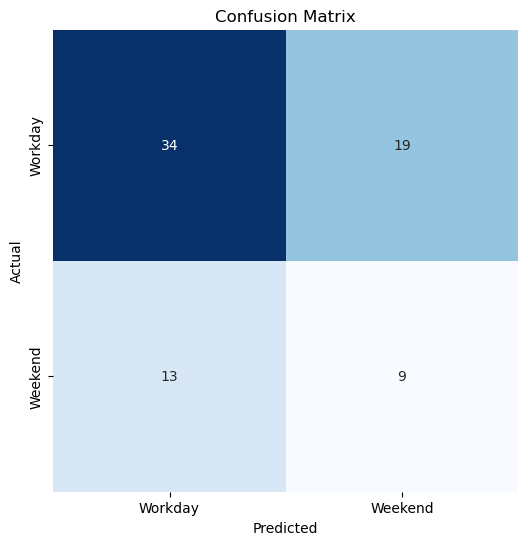

Classification Report:
---------------------
               precision    recall  f1-score   support

     Workday       0.72      0.64      0.68        53
     Weekend       0.32      0.41      0.36        22

    accuracy                           0.57        75
   macro avg       0.52      0.53      0.52        75
weighted avg       0.61      0.57      0.59        75



In [32]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['Workday', 'Weekend'])
clr = classification_report(y_test, y_pred, labels=['Workday', 'Weekend'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Workday', 'Weekend'])
plt.yticks(ticks=[0.5, 1.5], labels=['Workday', 'Weekend'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n---------------------\n", clr)